In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
def foo_k_r(T):
    return k_r0 * math.e**(-E_a/(R_u*T))

In [3]:
def foo_k(T, gas_name):
    if gas_name == 'H2':
        a0 = 0.3975
        a1 = 0.4814/10**4
        a2 = -1.073/10**7
        a3 = 4.6863/10**11
        a4 = -8.5361/10**15
        a5 = 5.6934/10**19
    elif gas_name == 'O2':
        a0 = 0.4697
        a1 = -2.9819/10**4
        a2 = 2.0320/10**7
        a3 = -7.1938/10**11
        a4 = 12.311/10**15
        a5 = -8.0736/10**19
    elif gas_name == 'H2O':
        a0 = 0.3834
        a1 = -1.8579/10**4
        a2 = 0.6266/10**7
        a3 = -1.0528/10**11
        a4 = 0.93554/10**15
        a5 = -0.38512/10**19
    else:
        print('Houston we have a problem')
    return 1 + a0 + a1*T + a2*T**2 + a3*T**3 + a4*T**4 + a5*T**5

In [4]:
def foo_alpha(r):
    if r >= 0.000001:
        a = 1 - math.e**(-r)
        return (1-a/r)/a
    else:
        return 0.5

In [5]:
# параметры установки
d = 45*10**(-3) # калибр
S = math.pi*d**2/4 # площадь
W_0 = 0.005 # объем каморы
l_d = 4.5 # длина ствола
m_elem = 0.52 # масса МЭ
p_f = 172 * 10**6 # давление форсирования
k_r0 = 9.87 * 10**8 # предэскп. множитель 

Q_t = 13.4 * 10**6 # энергия образования 1 кг продуктов реакций 
# E_ign = 0.5*10**6 # энергия воспламенителя
E_ign = 0*10**6 # энергия воспламенителя
E_a = 60*10**3 # энергия активации

v_p0 = 0 # начальная скорость
x_p0 = 0 # начальная координата
p_a = 10**5 # атмосфэрное давление

In [13]:
p_0 = 34.5 * 10**6 # начальное давление
T_0 = 300 # начальная температура
R_u = 8.31446262 # универсальная газовая постоянная
hi_O2_and_H2_0 = 1/8 # начальное соотношение мольных долей

In [14]:
mu_H2 = 2*10**(-3) # молярная масса водорода
mu_O2 = 16*10**(-3) # молярная масса кислорода
mu_H2O = 18*10**(-3) # молярная масса воды

In [15]:
# термодинамика
# R = foo_k_r * () # универсальная газовая постоянная
# m_g_0 = (2*mu_H2+mu_O2) * R_u * T_0/ (p_0 * W_0)
# print(m_g_0)
# rho_0 = m_g_0/W_0
# rho_0 = p_0/(R_u*T_0) # начальная плотность газа
# m_g_0 = rho_0*W_0 # начальная масса газа

# hi_O2_and_H2_0 = 8 # начальное соотношение мольных долей
# ratio_m_O2_and_m_H2_0 = hi_O2_and_H2_0*mu_O2/mu_H2 # начальное соотношение масс газа через мольные доли, скрин "мольные доли.png"

# m_H2_0 = m_g_0 / (ratio_m_O2_and_m_H2_0+1) # начальная масса водорода
# m_O2_0 = m_H2_0 * ratio_m_O2_and_m_H2_0 # начальная масса кислорода

# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода

# С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
# С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода

# C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [16]:
# n_smesi = p_0 * W_0/(R_u * T_0)
# m_O2_0 = n_smesi * mu_O2 / (hi_O2_and_H2_0 * mu_O2/mu_H2+1)
# m_H2_0 = n_smesi * mu_H2 - m_O2_0 / mu_O2 * mu_H2
# n_H2_0 = m_H2_0/mu_H2 # начальное количества вещества водорода
# n_O2_0 =  m_O2_0/mu_O2 # начальное количества вещества кислорода
# n_H2O_0 = 0 # начальное количества вещества воды

In [17]:
n_smesi = p_0 * W_0/(R_u * T_0)

n_H2_0 = n_smesi/(hi_O2_and_H2_0+1)# начальное количества вещества водорода
n_O2_0 =  n_H2_0 * hi_O2_and_H2_0  # начальное количества вещества кислорода
n_H2O_0 = 0 # начальное количества вещества воды

m_O2_0 = n_O2_0*mu_O2
m_H2_0 = n_H2_0*mu_H2

In [18]:
n_O2_0/n_H2_0

0.125

In [19]:
С_H2_0 = n_H2_0/W_0 # начальная молярная концентрация водорода
С_O2_0 = n_O2_0/W_0 # начальная молярная концентрация кислорода
C_H2O_0 = 0 # нет продуктов реакции в начальный момент времени

In [20]:
help_value_T_0 = (n_H2_0/(foo_k(T_0,'H2')-1) + n_O2_0/(foo_k(T_0,'O2')-1) + n_H2O_0/(foo_k(T_0,'H2O')-1))**(-1)
k_smesi_T_0 = 1 + n_H2_0*help_value_T_0 + n_O2_0*help_value_T_0 + n_H2O_0*help_value_T_0 # показатель адиабаты смеси для формулы 4.5

In [21]:
tau = 0 # время от начала процесса

C_n_1 = np.array([С_H2_0, 
                  С_O2_0, 
                  C_H2O_0]) # начальный вектор C

C_n = C_n_1

P_n = np.array([0,
                0,
                foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(1/2)]) # начальный вектор Р

D_n = np.array([foo_k_r(T_0)*C_n_1[1]**(1/2), 
                1/2*foo_k_r(T_0)*C_n_1[0]*C_n_1[1]**(-1/2),
                0]) # начальный вектор D
W_n_1 = W_0 # начальный объем
v_p = v_p0 # начальная скорость
x_p = x_p0 # начальная координата
T = T_0 # начальная температура
p_m = p_0 # начальное давление

tau_arr = np.array([])
C_H2_arr = np.array([])
C_O2_arr = np.array([])
C_H2O_arr = np.array([])
m_H2_arr = np.array([])
m_O2_arr = np.array([])
m_H2O_arr = np.array([])
v_p_arr = np.array([])
p_m_arr = np.array([])
x_p_arr = np.array([])
M_p_arr = np.array([])
# rho_arr = np.array([])
T_arr = np.array([])

dt = 1e-11

schetchik = 0
falg_fors = 0
flag_dt = 0

while x_p <= l_d: # условие цикла, пока МЭ не покинул дульный срез
    schetchik+=1
    
    if C_n[1] > С_O2_0 * 0.5 and flag_dt == 0:
        dt = 1e-10
    elif C_n[1] <= С_O2_0 * 0.5 and flag_dt == 0:
        dt = 1e-12
        flag_dt = 1
    elif C_n[1] <= С_O2_0 * 0.15 and flag_dt == 1:
        dt = 1e-13
        flag_dt = 2
    elif C_n[1] <= С_O2_0 * 0.006 and flag_dt == 2:
        dt = 1e-14
        flag_dt = 3
    elif C_n[1] <= 1 and flag_dt == 3:
        dt = 1e-10
        flag_dt = 4
    elif flag_dt == 4:
        dt = 1e-9
    
    tau += dt # время от начала процесса

    C_n = C_n_1 # вектор С
    
    W_n = W_n_1
    
    #     dM_p = mu_H2O * (C_n_1[2] - C_n[2]) * W_n # масса продуктов реакции   
    M_p = mu_H2O * C_n[2] * W_n
    
    n_H2 = C_n[0] * W_n # количество вещества водорода
    n_O2 = C_n[1] * W_n # количество вещества кислорода
    n_H2O = C_n[2] * W_n  # количество вещества воды
    
    m_H2 = n_H2 * mu_H2 # масса водорода
    m_O2 = n_O2 * mu_O2 # масса кислорода
    m_H2O = n_H2O * mu_H2O # масса воды

    n_smesi = n_H2 + n_O2 + n_H2O # количество вещества смеси

    phi = (1+(m_H2 + m_O2 + m_H2O)/(3*m_elem)) # фиктивность, масса всего
    
    # расчет показателя адиабаты смеси
    help_value = (n_H2/(foo_k(T,'H2')-1) + n_O2/(foo_k(T,'O2')-1) + n_H2O/(foo_k(T,'H2O')-1))**(-1)
    k_smesi = 1 + n_H2*help_value + n_O2*help_value + n_H2O*help_value # показатель адиабаты смеси для формулы 4.5
    
#     dp_m = (k_smesi-1)/W_n * ((p_0*W_0)/(k_smesi_T_0-1) + Q_t*dM_p - E_ign - phi/2*m_elem*v_p**2) * dt
#     p_m += dp_m
    p_m = (k_smesi-1)/W_n * ((p_0*W_0)/(k_smesi_T_0-1) + Q_t*M_p - E_ign - phi/2*m_elem*v_p**2) # среднебаллистическое давление

    T = p_m*W_n/(R_u*n_smesi)

    if p_m <= p_f and falg_fors == 0:
        dv_p = 0
    elif p_m <= p_f and falg_fors == 1:
        dv_p = (p_m - p_a)*S/(phi*m_elem) * dt
    elif  p_m > p_f:
        falg_fors = 1
        dv_p = (p_m - p_a)*S/(phi*m_elem) * dt # диф. скорости МЭ
    
    v_p += dv_p # скорость МЭ

    dx_p = v_p * dt # диф. координаты МЭ
    
    x_p += dx_p  # координата МЭ
    
    W_n_1 = W_0 + x_p*S  # Заснарядный объем на n+1 шаге
    
    W_n = W_0 + (x_p-dx_p)*S # Заснарядный объем на n шаге
           
    # вектор P и D
    if C_n[1] >= 5e-1 or C_n[0] >= 5e-1:
        P_n = np.array([0, 
                        0, 
                        foo_k_r(T)*C_n[0]*C_n[1]**(1/2)])
        
        D_n = np.array([foo_k_r(T)*C_n[1]**(1/2), 
                        1/2*foo_k_r(T)*C_n[0]*C_n[1]**(-1/2),
                        0])
    else:
        P_n = np.array([0, 0, 0])
        D_n = np.array([0, 0, 0]) 
        
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n)):
        foo_alpha_res[i] = foo_alpha(D_n[i]*dt)
        
    C_n_kr = W_n/W_n_1 * (C_n + (dt *(P_n-C_n*D_n))/(1+foo_alpha_res*D_n*dt)) # Предиктор вектора С
   
    if C_n_kr[1] >= 5e-1 or C_n_kr[1] >= 5e-1:
        D_n_kr = (np.array([foo_k_r(T)*C_n_kr[1]**(1/2), 
                            1/2*foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(-1/2),
                            0]) + D_n)/2 # Предиктор вектора D
    else:
        D_n_kr = np.array([0,0,0])
            
    foo_alpha_res = np.array([0,0,0]) # значение умножения алфа функции от произведения вектора D на dt, 
    for i in range(len(D_n_kr)):
        foo_alpha_res[i] = foo_alpha(D_n_kr[i]*dt)
        
    if C_n_kr[1] >= 5e-1 or C_n_kr[1] >= 5e-1:
        P_n_kr = foo_alpha_res*np.array([0, 
                                         0, 
                                         foo_k_r(T)*C_n_kr[0]*C_n_kr[1]**(1/2)]) + (1-foo_alpha_res)*P_n # Предиктор вектора P    
    else:
        P_n_kr = np.array([0,0,0])
        
    C_n_1 = W_n/W_n_1 * (C_n + (dt *(P_n_kr-C_n*D_n_kr))/(1+foo_alpha_res*D_n_kr*dt)) # Корректор вектора С
    
    if schetchik % 10_000 == 0:
        tau_arr = np.append(tau_arr, tau)
        x_p_arr = np.append(x_p_arr, x_p)
        C_H2_arr = np.append(C_H2_arr, C_n[0])
        C_O2_arr = np.append(C_O2_arr, C_n[1])
        C_H2O_arr = np.append(C_H2O_arr, C_n[2])
        m_H2_arr = np.append(m_H2_arr, m_H2)
        m_O2_arr = np.append(m_O2_arr, m_O2)
        m_H2O_arr = np.append(m_H2O_arr, m_H2O)
        M_p_arr = np.append(M_p_arr, M_p)
        v_p_arr = np.append(v_p_arr, v_p)
        T_arr = np.append(T_arr,T)
        p_m_arr = np.append(p_m_arr, p_m)
    if schetchik % 100_000 == 0:
        print(tau, x_p, p_m/10**6, C_n, T, dt, flag_dt)

1.0000000000009798e-05 0.0 34.516205451420944 [1.22943364e+04 1.53672791e+03 1.71034657e-01] 300.14277271414267 1e-10 0
2.0000000000031725e-05 0.0 34.532597233654016 [1.22941634e+04 1.53664140e+03 3.44042470e-01] 300.2871889012915 1e-10 0
3.0000000000053652e-05 0.0 34.549179331569164 [1.22939883e+04 1.53655389e+03 5.19065695e-01] 300.43328373381445 1e-10 0
4.000000000007558e-05 0.0 34.565956025699464 [1.22938113e+04 1.53646535e+03 6.96149750e-01] 300.5810949920135 1e-10 0
5.0000000000097506e-05 0.0 34.58293174034754 [1.22936321e+04 1.53637575e+03 8.75341584e-01] 300.73066172569605 1e-10 0
6.000000000011943e-05 0.0 34.60011105004312 [1.22934507e+04 1.53628508e+03 1.05668974e+00] 300.8820243112294 1e-10 0
6.999999999953388e-05 0.0 34.61749868636568 [1.22932672e+04 1.53619330e+03 1.24024443e+00] 301.0352245117981 1e-10 0
7.999999999887818e-05 0.0 34.63509954515626 [1.22930813e+04 1.53610040e+03 1.42605761e+00] 301.19030554112743 1e-10 0
8.999999999822248e-05 0.0 34.65291869414652 [1.22928

0.000710000000031171 0.0 36.698280783824515 [12271.24627472  1525.18286174    23.26112693] 319.38405063999795 1e-10 0
0.0007200000000345811 0.0 36.76840332047793 [12270.50223461  1524.81084168    24.00516704] 320.0029393394683 1e-10 0
0.0007300000000379912 0.0 36.841696856294334 [12269.72441077  1524.42192976    24.78299088] 320.64985191155097 1e-10 0
0.0007400000000414012 0.0 36.91844721135728 [12268.90975055  1524.01459965    25.5976511 ] 321.32731628078784 1e-10 0
0.0007500000000448113 0.0 36.99897992724126 [12268.05477626  1523.58711251    26.45262538] 322.03821188806745 1e-10 0
0.0007600000000482213 0.0 37.083667907622825 [12267.15550334  1523.13747605    27.3518983 ] 322.78583733764924 1e-10 0
0.0007700000000516314 0.0 37.17294097646023 [12266.20733785  1522.6633933     28.30006379] 323.5739950282245 1e-10 0
0.0007800000000550415 0.0 37.26729795901456 [12265.20494699  1522.16219787    29.30245466] 324.4070981309325 1e-10 0
0.0007900000000584515 0.0 37.36732212545523 [12264.142093

0.004868107227006372 3.461881942383549 90.08989377823075 [4.40545780e+03 4.75131752e-01 1.45492427e+03] 1848.7609089513703 1e-09 4
0.004968107227040473 3.616800144341772 87.5901523249721 [4.30450736e+03 4.64244176e-01 1.42158489e+03] 1839.617560821147 1e-09 4
0.005068107227074573 3.773883930162582 85.18107365349366 [4.20676247e+03 4.53702320e-01 1.38930416e+03] 1830.5889589087308 1e-09 4
0.005168107227108674 3.933073668391901 82.85958861534506 [4.11213406e+03 4.43496578e-01 1.35805265e+03] 1821.6763848949429 1e-09 4
0.005268107227142774 4.094311895521773 80.62262214587281 [4.02053100e+03 4.33617124e-01 1.32780029e+03] 1812.8806915566365 1e-09 4
0.005368107227176875 4.257543239927814 78.46711560027586 [3.93186107e+03 4.24054009e-01 1.29851661e+03] 1804.2023528351583 1e-09 4
0.0054681072272109756 4.422714346205115 76.39004503322879 [3.84603161e+03 4.14797241e-01 1.27017100e+03] 1795.641509115174 1e-09 4


In [22]:
len(tau_arr)

1424

In [23]:
v_p_arr[-1], max(p_m_arr/10**6)

(1668.7494158119594, 221.1458842208882)

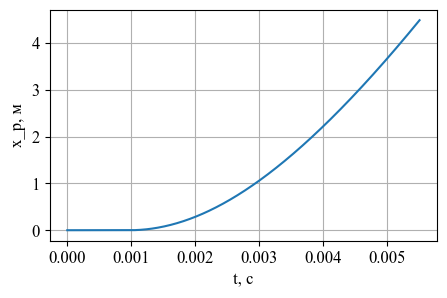

In [24]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, x_p_arr)
plt.xlabel('t, с')
plt.ylabel('x_p, м')
plt.grid()

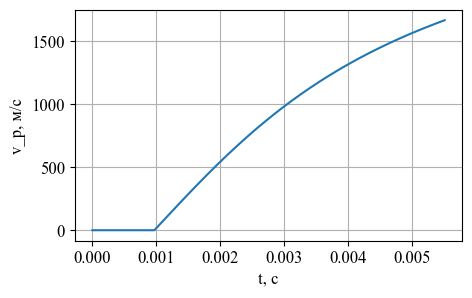

In [25]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, v_p_arr)
plt.xlabel('t, с')
plt.ylabel('v_p, м/с')
plt.grid()

In [26]:
m_H2_arr, m_O2_arr, m_H2O_arr

(array([0.1229449 , 0.12294473, 0.12294456, ..., 0.09256645, 0.09256645,
        0.09256645]),
 array([1.22944393e-01, 1.22943712e-01, 1.22943030e-01, ...,
        7.98668567e-05, 7.98668567e-05, 7.98668567e-05]),
 array([1.53129989e-06, 3.06449252e-06, 4.59942863e-06, ...,
        2.75134752e-01, 2.75134752e-01, 2.75134752e-01]))

In [27]:
# p_m зависит от v_p, v_p зависит от dv_p, что зависит от dt

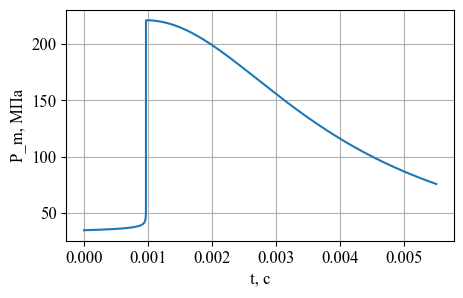

In [28]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, p_m_arr/10**6)
plt.xlabel('t, с')
plt.ylabel('P_m, МПа')
plt.grid()

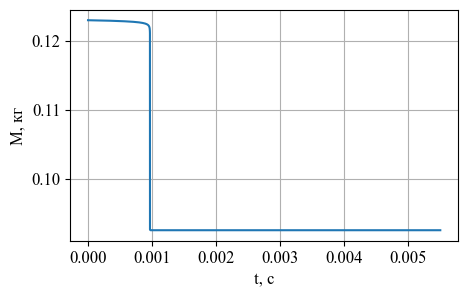

In [29]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, m_H2_arr)
plt.xlabel('t, с')
plt.ylabel('M, кг')
plt.grid()

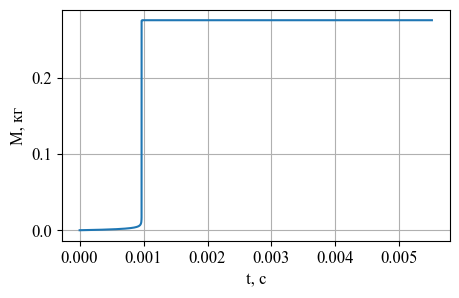

In [30]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, M_p_arr)
plt.xlabel('t, с')
plt.ylabel('M, кг')
plt.grid()

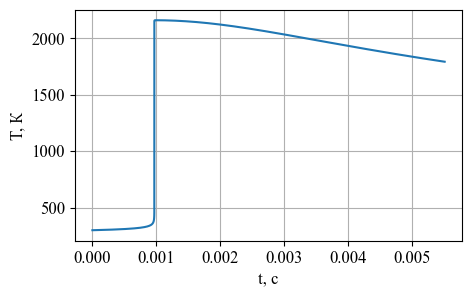

In [31]:
plt.figure(figsize=(5,3))
plt.plot(tau_arr, T_arr)
plt.xlabel('t, с')
plt.ylabel('T, К')
plt.grid()